In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/data/train'
valid_path = '/content/drive/My Drive/data/val'

In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 3s 0us/step


In [4]:
for layer in inception.layers:
    layer.trainable = False

In [5]:
folders = glob('/content/drive/My Drive/data/train/*')

In [6]:
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [11]:

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/data/val',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
122/122 [==============================] - 1694s 14s/step - loss: 1.5913 - accuracy: 0.7888 - val_loss: 0.5108 - val_accuracy: 0.9352
Epoch 2/20
122/122 [==============================] - 36s 291ms/step - loss: 1.0629 - accuracy: 0.8754 - val_loss: 0.6831 - val_accuracy: 0.9290
Epoch 3/20
122/122 [==============================] - 36s 293ms/step - loss: 1.2427 - accuracy: 0.8857 - val_loss: 0.8530 - val_accuracy: 0.8920
Epoch 4/20
122/122 [==============================] - 35s 290ms/step - loss: 0.8740 - accuracy: 0.9149 - val_loss: 2.4184 - val_accuracy: 0.8302
Epoch 5/20
122/122 [==============================] - 36s 295ms/step - loss: 1.1039 - accuracy: 0.9103 - val_loss: 2.7143 - val_accuracy: 0.8488
Epoch 6/20
122/122 [==============================] - 36s 295ms/step - loss: 1.0718 - accuracy: 0.9200 - val_loss: 0.8633 - val_accuracy: 0.9074
Epoch 7/20
122/122 [==============================] - 

In [13]:
import matplotlib.pyplot as plt

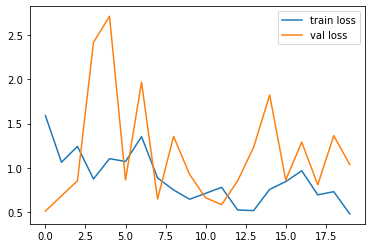

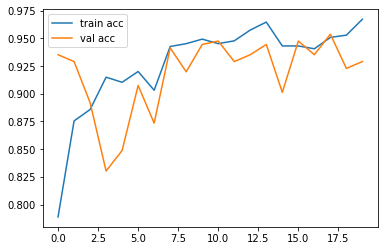

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [16]:
y_pred = model.predict(test_set)

In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_inception.h5')

In [20]:
img=image.load_img('/content/drive/My Drive/data/test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224,224))

In [21]:
x=image.img_to_array(img)

In [22]:
x=x/255

In [23]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [24]:
model.predict(img_data)

array([[9.9930489e-01, 9.1184562e-09, 6.0769916e-04, 8.7436565e-05]],
      dtype=float32)

In [25]:
a=np.argmax(model.predict(img_data), axis=1)

In [26]:
a == 1

array([False])